In [1]:
!pip install git+https://github.com/par-tec/esco-playground.git

  Cloning https://github.com/par-tec/esco-playground.git to /tmp/pip-req-build-_v5mk_w_
  Running command git clone --filter=blob:none --quiet https://github.com/par-tec/esco-playground.git /tmp/pip-req-build-_v5mk_w_
  Resolved https://github.com/par-tec/esco-playground.git to commit f55d2cc22470fecc3319a01b0a458fbcec67680e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3

In [2]:
import spacy
from collections import Counter
import esco


nlp = spacy.load("en_core_web_sm")
db = esco.LocalDB()

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
def lemmatize_text(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

In [16]:
import spacy
from spacy.matcher import Matcher

labels = ['assure customer satisfaction',
          'customer satisfaction guarantee',
          'ensure customer satisfaction',
          'guarantee customer satisfaction',
          'guaranteeing customer satisfaction',
          'promise customer satisfaction',
          'provide customer satisfaction',
          'to guarantee customer satisfaction']

# Crea un matcher
matcher = Matcher(nlp.vocab)

# Definisci il pattern: VERBO seguito da NOME

pattern = [
    {"POS": "ADP", "OP": "*"},
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP" : "*"},
    {"POS": "CCONJ", "OP": "*"},
    {"POS": "VERB"},
    {"POS": "ADP", "OP": "*"},
    {"POS": "ADJ", "OP": "*"},
    {"POS": "CCONJ", "OP": "*"},
    {"POS": "VERB", "OP" : "*"},
    {"POS": "CCONJ", "OP": "*"},
    {"POS": {"IN": ["NOUN", "PROPN"]}, "OP": "+"},
    {"POS": "PUNCT", "OP":"?"},
    {"POS": "VERB", "OP" : "*"},
    {"POS": "ADP", "OP": "*"},
    {"POS": "CCONJ", "OP": "*"},
    {"POS": "ADJ", "OP": "*"},
    {"POS": "NOUN", "OP":"*"},
    {"POS": "ADV", "OP":"*"}
]
'''
ho chiesto a Copilot di scrivermelo in modo più compatto, anche se il mio pattern ha delle percentuali di accuratezza migliori +-2%
pattern = [
    {"POS": {"IN": ["ADP", "PART", "ADV"]}, "OP": "*"},
    {"POS": {"IN": ["ADJ", "NOUN", "CCONJ"]}, "OP": "*"},
    {"POS": "VERB"},
    {"POS": {"IN": ["ADP", "PART", "ADV"]}, "OP": "*"},
    {"POS": {"IN": ["ADJ", "CCONJ"]}, "OP": "*"},
    {"POS": {"IN": ["NOUN", "PROPN"]}, "OP": "+"},
    {"POS": {"IN": ["PUNCT", "CCONJ"]}, "OP": "?"},
    {"POS": {"IN": ["VERB", "ADP", "ADJ", "ADV", "NOUN"]}, "OP": "*"}
]
'''
# Aggiungi il pattern al matcher
matcher.add("VERB_NOUN_PATTERN", [pattern])

# Funzione per applicare il matcher e restituire le corrispondenze
def match_verb_noun(text):
    doc = nlp(text)
    matches = matcher(doc)
    return [doc[start:end].text for _, start, end in matches]

# Applica il matcher a tutte le etichette
for label in labels:
    matches = match_verb_noun(label)
    if matches:
        print(f"Label: {label}")
        print(f"Matches: {matches}")
        print()

Label: assure customer satisfaction
Matches: ['assure customer', 'assure customer satisfaction']

Label: ensure customer satisfaction
Matches: ['ensure customer', 'ensure customer satisfaction']

Label: guarantee customer satisfaction
Matches: ['guarantee customer', 'guarantee customer satisfaction']

Label: guaranteeing customer satisfaction
Matches: ['guaranteeing customer', 'guaranteeing customer satisfaction']

Label: promise customer satisfaction
Matches: ['promise customer', 'promise customer satisfaction']

Label: provide customer satisfaction
Matches: ['provide customer', 'provide customer satisfaction']

Label: to guarantee customer satisfaction
Matches: ['guarantee customer', 'guarantee customer satisfaction']



```
Label: assure customer satisfaction
Matches: ['assure customer', 'assure customer satisfaction']

Label: ensure customer satisfaction
Matches: ['ensure customer', 'ensure customer satisfaction']

Label: guarantee customer satisfaction
Matches: ['guarantee customer', 'guarantee customer satisfaction']

Label: guaranteeing customer satisfaction
Matches: ['guaranteeing customer', 'guaranteeing customer satisfaction']

Label: promise customer satisfaction
Matches: ['promise customer', 'promise customer satisfaction']

Label: provide customer satisfaction
Matches: ['provide customer', 'provide customer satisfaction']

Label: to guarantee customer satisfaction
Matches: ['guarantee customer', 'guarantee customer satisfaction']
```

In [10]:
def match_verb_noun(text):
    doc = nlp(text)
    matches = matcher(doc)
    if matches:
        # Ordina i match per lunghezza e prendi il più lungo
        longest_match = max(matches, key=lambda x: x[2] - x[1])
        return doc[longest_match[1]:longest_match[2]].text
    return None

# Applica il matcher a tutte le etichette
for label in labels:
    match = match_verb_noun(label)
    if match:
        print(f"Label: {label}")
        print(f"Longest match: {match}")
        print()

Label: assure customer satisfaction
Longest match: assure customer satisfaction

Label: ensure customer satisfaction
Longest match: ensure customer satisfaction

Label: guarantee customer satisfaction
Longest match: guarantee customer satisfaction

Label: guaranteeing customer satisfaction
Longest match: guaranteeing customer satisfaction

Label: promise customer satisfaction
Longest match: promise customer satisfaction

Label: provide customer satisfaction
Longest match: provide customer satisfaction

Label: to guarantee customer satisfaction
Longest match: to guarantee customer satisfaction



```
Label: assure customer satisfaction
Longest match: assure customer satisfaction

Label: ensure customer satisfaction
Longest match: ensure customer satisfaction

Label: guarantee customer satisfaction
Longest match: guarantee customer satisfaction

Label: guaranteeing customer satisfaction
Longest match: guaranteeing customer satisfaction

Label: promise customer satisfaction
Longest match: promise customer satisfaction

Label: provide customer satisfaction
Longest match: provide customer satisfaction

Label: to guarantee customer satisfaction
Longest match: to guarantee customer satisfaction
```

In [6]:
res = set()
for altLabel in db.skills.altLabel:
  print(altLabel)
  for label in altLabel:
    res.add(label)
    print(label)

Output streaming troncato alle ultime 5000 righe.
['de-rigging electronic equipment', 'dismantle electronic equipment', 'disassemble electronic equipment', 'de-rig electronic equipment', 'disconnect electronic equipment']
de-rigging electronic equipment
dismantle electronic equipment
disassemble electronic equipment
de-rig electronic equipment
disconnect electronic equipment
['store digital data and systems', 'backup digital data and systems', 'back up data', 'storing digital data and systems', 'archive digital data and systems', 'store digital data and system', 'cache digital data and systems', 'use data and systems archiving tools', 'use data and systems archiving procedures', 'store systems and digital data', 'restore data']
store digital data and systems
backup digital data and systems
back up data
storing digital data and systems
archive digital data and systems
store digital data and system
cache digital data and systems
use data and systems archiving tools
use data and systems a

In [17]:
# Funzione per applicare il matcher e restituire la corrispondenza più lunga
def match_verb_noun(text):
    doc = nlp(text)
    matches = matcher(doc)
    if matches:
        longest_match = max(matches, key=lambda x: x[2] - x[1])
        return doc[longest_match[1]:longest_match[2]].text
    return None

# Inizializza i contatori
exact_match_count = [0,0,0]
total_processed = [0,0,0]
total_match = [0,0,0]
test_nwords = [3,4,5]
c = 0
# Applica il matcher a tutte le etichette
for n in test_nwords:
  print(f"Processing labels with {n} words...")
  for label in res:
      word_count = len(label.split())
      if word_count == n:  # Controlla se la label ha esattamente # parole
          total_processed[c] += 1
          match = match_verb_noun(label)
          if match:
              total_match[c] += 1
              if match.lower() == label.lower():  # Confronta ignorando maiuscole/minuscole
                  exact_match_count[c] += 1
  c += 1

# Stampa i risultati
for i in range(len(test_nwords)):
  print(f"Number of labels with exact match for {test_nwords[i]} words: {exact_match_count[i]}")
  print(f"Total number of labels processed for {test_nwords[i]} words: {total_processed[i]}")
  print(f"Total number of labels matched for {test_nwords[i]} words: {total_match[i]}")
  print()

# Calcola e stampa le percentuali
for i in range(len(test_nwords)):
  percentage = (exact_match_count[i] / total_processed[i]) * 100
  print(f"Percentage of exact matches for {test_nwords[i]} words: {percentage:.2f}%")

Processing labels with 3 words...
Processing labels with 4 words...
Processing labels with 5 words...
Number of labels with exact match for 3 words: 1094
Total number of labels processed for 3 words: 1901
Total number of labels matched for 3 words: 1145

Number of labels with exact match for 4 words: 841
Total number of labels processed for 4 words: 1374
Total number of labels matched for 4 words: 888

Number of labels with exact match for 5 words: 464
Total number of labels processed for 5 words: 872
Total number of labels matched for 5 words: 594

Percentage of exact matches for 3 words: 57.55%
Percentage of exact matches for 4 words: 61.21%
Percentage of exact matches for 5 words: 53.21%


```
Processing labels with 3 words...
Processing labels with 4 words...
Processing labels with 5 words...
Number of labels with exact match for 3 words: 1094
Total number of labels processed for 3 words: 1901
Total number of labels matched for 3 words: 1145

Number of labels with exact match for 4 words: 841
Total number of labels processed for 4 words: 1374
Total number of labels matched for 4 words: 888

Number of labels with exact match for 5 words: 464
Total number of labels processed for 5 words: 872
Total number of labels matched for 5 words: 594

Percentage of exact matches for 3 words: 57.55%
Percentage of exact matches for 4 words: 61.21%
Percentage of exact matches for 5 words: 53.21%
```

Problema iniziale:


*   creare un matcher in grado di individuare le skill, e inserirlo all'interno del model.py nel quale già ne è presente uno che serve a individuare le knowledge.

Perchè non possiamo utilizzare lo stesso ?

Perchè la maggior parte delle label delle knowledge sono composte da 1,2,3 parole, invece le label associate alle skill sono più complesse e possono arrivare anche e 10 parole.

L'analisi principale è stata fatta su label composte da 3,4,5 parole la quale ha portato a risultati soddisfacenti con un'accuratezza circa del 60%.

Per implementare il matcher ho fatto riferimento prima ad uno specifico esempio, per vedere come funzionazano le varie componenti che mi permettevano di filtrare e individuare le label come preferivo. Successivamente ho caricato la libreria esco, e analizzato per i casi generici.

Inizialmente ho provato a seguire un pattern ricorrente il quale è VERBO + COMPLEMENTO OGETTO, ottenendo un'accuratezza del 20%. Tale accuratezza, nonostante la semplicità del pattern non mi soddisfava e ho deciso di rendere il pattern più dettagliato inserendo altri dettagli in esso.

Il pattern veniva modificato nel seguente modo:


1.   individuazione di un pattern ricorrente dentro il set di label che non matchavano
2.   implementazione sul pattern attuale

I pattern individuati che hanno prodotto un cambio di percentuale notevole sono stati:

VERB+NOUN+ADV

VERB+CONJ+ADJ+NOUN

Come individuavo il pattern ?

Tramite displacy riuscivo a classificare ciascuna word all'interno della label e grazie a ciò l'individuazione del pattern era molto più chiara.





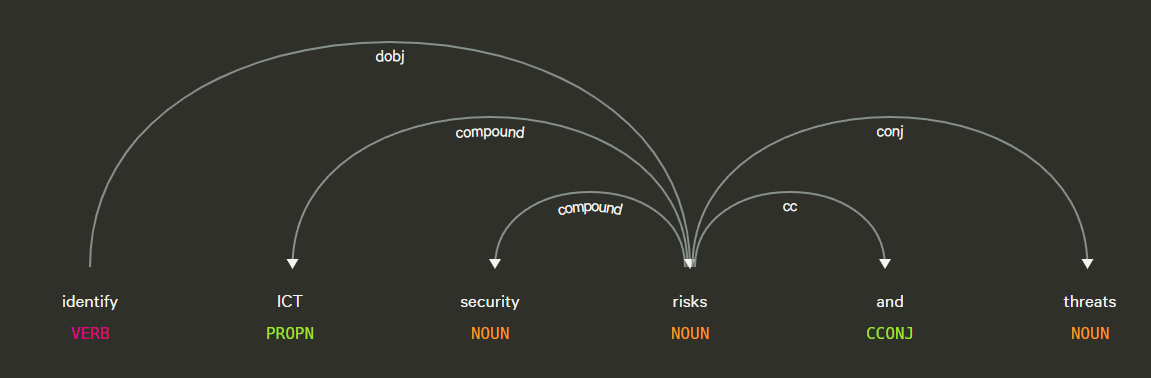